# Bitcoin - Regression

Examine bitcoin prices and see if we can predict the value.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%%time
# Resampling data from minute interval to day
bit_df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bit_df

CPU times: user 887 ms, sys: 85.3 ms, total: 972 ms
Wall time: 971 ms


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
1,1417412040,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
2,1417412100,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
3,1417412160,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
4,1417412220,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
...,...,...,...,...,...,...,...,...
1574269,1515369360,16174.21,16174.23,16174.21,16174.23,7.594119,122828.956770,16174.221301
1574270,1515369420,16174.23,16174.23,16174.21,16174.22,11.902468,192513.150940,16174.221081
1574271,1515369480,16174.22,16174.22,16174.21,16174.21,3.860840,62446.073684,16174.218136
1574272,1515369540,16174.22,16174.22,16174.21,16174.22,1.179093,19070.914509,16174.219514


In [3]:
%%time
# Convert unix time to datetime
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s') # return series type as datetime64
# Reset index
bit_df = bit_df.set_index('date')
# Rename columns so easier to code
bit_df = bit_df.rename(columns={'Open':'open', 'High': 'hi', 'Low': 'lo', 
                       'Close': 'close', 'Volume_(BTC)': 'vol_btc',
                       'Volume_(Currency)': 'vol_cur', 
                       'Weighted_Price': 'wp', 'Timestamp': 'ts'})
# Resample and only use recent samples that aren't missing
bit_df = bit_df.resample('d').agg({'open': 'first', 'hi': 'max', 
    'lo': 'min', 'close': 'last', 'vol_btc': 'sum',
    'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min'})
# remove missing values
bit_df = bit_df.dropna()
# drop last row as it is incomplete
bit_df = bit_df.iloc[:-1]
bit_df

CPU times: user 173 ms, sys: 28.4 ms, total: 202 ms
Wall time: 200 ms


,open,hi,lo,close,vol_btc,vol_cur,wp,ts
date,,,,,,,,
2014-12-01,300.00,370.00,300.00,370.00,28.122206,1.036952e+04,366.775068,1.417412e+09
2014-12-02,370.00,378.00,370.00,378.00,2473.207173,9.347988e+05,375.943001,1.417478e+09
2014-12-03,378.00,378.00,377.01,378.00,62.913451,2.376454e+04,377.882701,1.417565e+09
2014-12-04,378.00,378.00,377.10,377.10,1.090000,4.120110e+02,377.991743,1.417651e+09
2014-12-06,378.00,378.00,378.00,378.00,0.015000,5.670000e+00,378.000000,1.417830e+09
...,...,...,...,...,...,...,...,...
2018-01-03,14781.52,15400.00,14628.00,15098.14,17616.327677,2.642264e+08,14989.939350,1.514938e+09
2018-01-04,15098.23,15400.00,14230.00,15144.99,19567.016783,2.909045e+08,14851.477880,1.515024e+09
2018-01-05,15145.00,17178.00,14819.78,16960.01,22588.046307,3.619888e+08,15796.596968,1.515110e+09


In [4]:
# getting the date as a column
bit_df = bit_df.reset_index()
# column reorder
bit_df = bit_df[['open', 'hi', 'lo', 'close', 'vol_btc', 'vol_cur', 'wp', 'date', 'ts']]
bit_df

,open,hi,lo,close,vol_btc,vol_cur,wp,date,ts
0,300.00,370.00,300.00,370.00,28.122206,1.036952e+04,366.775068,2014-12-01,1.417412e+09
1,370.00,378.00,370.00,378.00,2473.207173,9.347988e+05,375.943001,2014-12-02,1.417478e+09
2,378.00,378.00,377.01,378.00,62.913451,2.376454e+04,377.882701,2014-12-03,1.417565e+09
3,378.00,378.00,377.10,377.10,1.090000,4.120110e+02,377.991743,2014-12-04,1.417651e+09
4,378.00,378.00,378.00,378.00,0.015000,5.670000e+00,378.000000,2014-12-06,1.417830e+09
...,...,...,...,...,...,...,...,...,...
1095,14781.52,15400.00,14628.00,15098.14,17616.327677,2.642264e+08,14989.939350,2018-01-03,1.514938e+09
1096,15098.23,15400.00,14230.00,15144.99,19567.016783,2.909045e+08,14851.477880,2018-01-04,1.515024e+09
1097,15145.00,17178.00,14819.78,16960.01,22588.046307,3.619888e+08,15796.596968,2018-01-05,1.515110e+09
1098,16960.01,17174.00,16251.01,17098.99,13744.804428,2.296885e+08,16661.988247,2018-01-06,1.515197e+09


## Predict tomorrow's close based on today's info?
We will use a row of data for input. We will call the input X and the prediction y. This is called "supervised learning" as we will feed in both X and y to train the model.

This performs better if we *standardize* the data.

Predict the open price from the ts component.

In [5]:
# changing name for convenience
bitcoin = bit_df

## Exploring the data

### Descriptive Statistics

In [6]:
bitcoin.shape

(1100, 9)

In [7]:
bitcoin.head()

,open,hi,lo,close,vol_btc,vol_cur,wp,date,ts
0,300.0,370.0,300.00,370.0,28.122206,10369.516294,366.775068,2014-12-01,1.417412e+09
1,370.0,378.0,370.00,378.0,2473.207173,934798.804584,375.943001,2014-12-02,1.417478e+09
2,378.0,378.0,377.01,378.0,62.913451,23764.537508,377.882701,2014-12-03,1.417565e+09
3,378.0,378.0,377.10,377.1,1.090000,412.011000,377.991743,2014-12-04,1.417651e+09
4,378.0,378.0,378.00,378.0,0.015000,5.670000,378.000000,2014-12-06,1.417830e+09


In [8]:
bitcoin.describe()

,open,hi,lo,close,vol_btc,vol_cur,wp,ts
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1.100000e+03,1100.000000,1.100000e+03
mean,1693.188255,1763.416145,1619.327536,1707.485245,10123.167247,3.245756e+07,1696.792573,1.467783e+09
std,3054.417370,3224.279848,2860.303035,3085.222620,9640.673382,1.050214e+08,3051.199323,2.748898e+07
min,170.000000,210.000000,0.060000,120.000000,0.015000,5.670000e+00,162.566457,1.417412e+09
25%,290.070000,296.542500,284.860000,290.067500,5288.725207,2.156353e+06,291.394705,1.444068e+09
50%,587.125000,595.315000,576.380000,587.620000,7428.731950,3.263503e+06,587.013102,1.467806e+09
75%,1214.335000,1241.450000,1190.092500,1216.655000,11763.464515,1.378968e+07,1212.776865,1.491545e+09
max,19650.020000,19891.990000,19010.000000,19650.010000,165763.024424,1.393385e+09,19537.276941,1.515283e+09


In [9]:
bitcoin.dtypes

open              float64
hi                float64
lo                float64
close             float64
vol_btc           float64
vol_cur           float64
wp                float64
date       datetime64[ns]
ts                float64
dtype: object

In [10]:
# correlation between attributes
correlation = bitcoin.corr(method='pearson')
correlation

,open,hi,lo,close,vol_btc,vol_cur,wp,ts
open,1.000000,0.997614,0.996650,0.997202,0.522626,0.837052,0.998826,0.630501
hi,0.997614,1.000000,0.996111,0.999209,0.536621,0.853297,0.999008,0.626694
lo,0.996650,0.996111,1.000000,0.997930,0.500865,0.809041,0.998568,0.638674
close,0.997202,0.999209,0.997930,1.000000,0.523713,0.839173,0.999293,0.630931
vol_btc,0.522626,0.536621,0.500865,0.523713,1.000000,0.682497,0.521643,0.335338
vol_cur,0.837052,0.853297,0.809041,0.839173,0.682497,1.000000,0.834569,0.429897
wp,0.998826,0.999008,0.998568,0.999293,0.521643,0.834569,1.000000,0.632632
ts,0.630501,0.626694,0.638674,0.630931,0.335338,0.429897,0.632632,1.000000


### Data Visualization

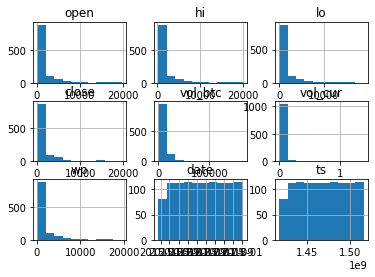

In [11]:
# histogram
bitcoin.hist()
plt.show()

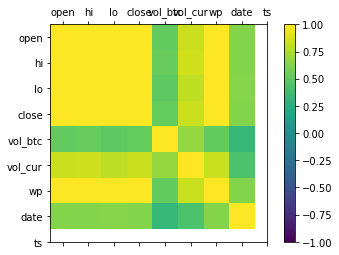

In [12]:
# Correlation Matrix Plot
correlations = bitcoin.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(bitcoin.columns)
ax.set_yticklabels(bitcoin.columns)
plt.show()

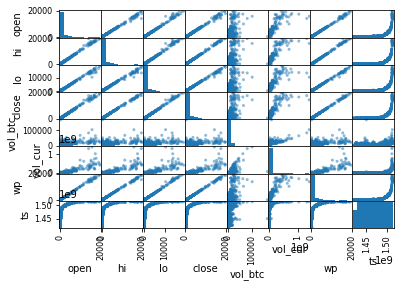

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(bitcoin)
plt.show()

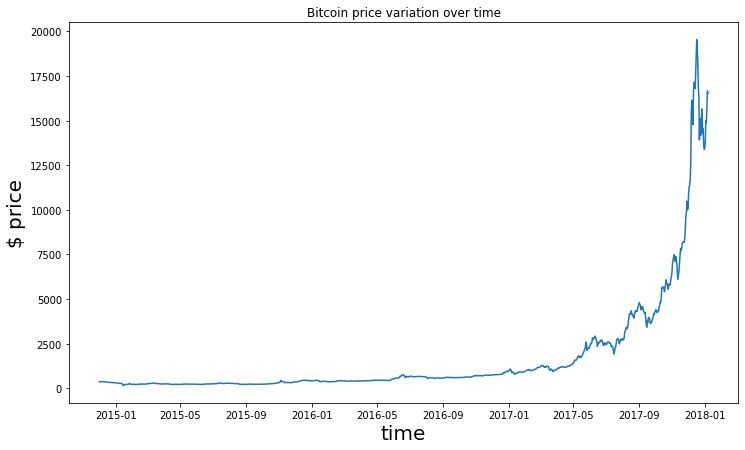

In [14]:
# plot to see how bitcoin price has changed over time
plt.figure(figsize = (12, 7))

plt.plot(bitcoin['date'], bitcoin['wp'])

plt.title('Bitcoin price variation over time')
plt.xlabel('time', size=20)
plt.ylabel('$ price', size=20)

plt.show()

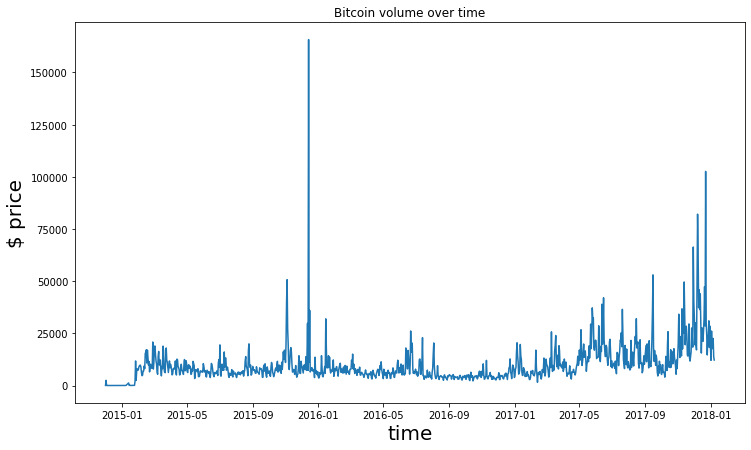

In [15]:
# plot to see how bitcoin volume has changed over time
plt.figure(figsize = (12, 7))

plt.plot(bitcoin.date, bitcoin['vol_btc'])

plt.title('Bitcoin volume over time')
plt.xlabel('time', size=20)
plt.ylabel('$ price', size=20)

plt.show()

In [16]:
X = bitcoin[['hi', 'lo', 'close', 'vol_btc', 'vol_cur', 'wp']]
y = bitcoin['open']

# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

rescaledX.shape

(1100, 6)

In [17]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Linear Regression

In [18]:
# model preparation and evaluation
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()

# fitting the data
linReg.fit(X_train, y_train)

# calculating the score on test data
print('Model score: ', linReg.score(X_test, y_test))

y_pred = linReg.predict(X_test)

from sklearn import metrics

# The coefficients
print('Coefficients: ', linReg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % metrics.mean_absolute_error(y_test, y_pred))

Model score:  0.9995402392353315
Coefficients:  [-5.92955364e-02 -2.31505103e-01 -6.33814767e-01 -1.27922282e-03
  3.70384990e-07  1.90973522e+00]
Mean squared error: 3468.09
Mean absolute error: 21.50


In [19]:
# output in the form of dataframe
# dataframe takes input as list or np.array
out = pd.DataFrame(data=y_test.tolist(), columns=['test'])
out['predict'] = y_pred # add column to dataframe
out

,test,predict
0,352.56,356.870004
1,908.99,924.825963
2,6024.85,5849.134056
3,289.68,295.377398
4,572.94,572.649320
...,...,...
325,442.43,456.925642
326,452.25,448.626090
327,449.26,458.746960
328,378.00,386.563722


## Predicting the Open price

For predicting the future values, I will create a future dataframe by shifting the original data by 30 days and use this to make predictions of future prices.

In [20]:
future_set = bitcoin.shift(periods=30).tail(30)
future_set = future_set.set_index(np.arange(1040,1070))
future_set

,open,hi,lo,close,vol_btc,vol_cur,wp,date,ts
1040,7467.97,7470.01,7079.00,7156.00,17509.919783,1.266867e+08,7247.665142,2017-11-09,1.510186e+09
1041,7156.00,7350.00,6426.00,6577.62,32791.171918,2.230231e+08,6966.398741,2017-11-10,1.510272e+09
1042,6577.63,6894.99,6201.01,6346.70,24975.577100,1.616964e+08,6557.900280,2017-11-11,1.510358e+09
1043,6346.64,6486.00,5511.11,5886.35,49610.285267,2.985255e+08,6097.406380,2017-11-12,1.510445e+09
1044,5886.35,6841.45,5850.00,6535.87,35150.890526,2.245962e+08,6355.194349,2017-11-13,1.510531e+09
1045,6535.87,6748.00,6464.64,6605.00,19505.257774,1.287293e+08,6590.486602,2017-11-14,1.510618e+09
1046,6605.00,7349.00,6605.00,7294.00,27327.128465,1.930247e+08,7051.732138,2017-11-15,1.510704e+09
1047,7294.00,7985.37,7130.00,7838.53,28404.999214,2.149937e+08,7457.429556,2017-11-16,1.510790e+09
1048,7838.54,7988.50,7536.00,7714.71,23950.847741,1.872904e+08,7837.660573,2017-11-17,1.510877e+09
1049,7714.70,7847.98,7502.00,7777.01,14531.700663,1.116767e+08,7714.778844,2017-11-18,1.510963e+09


In [21]:
prediction = linReg.predict(future_set[['hi', 'lo', 'close', 'vol_btc', 'vol_cur', 'wp']])

In [22]:
out2 = pd.DataFrame(data=future_set.open.tolist(), columns=['test'])
out2['predict'] = prediction # add column to dataframe
out2

,test,predict
0,7467.97,7262.558724
1,7156.00,7266.422491
2,6577.63,6699.008873
3,6346.64,6314.496898
4,5886.35,6286.711436
5,6535.87,6539.997195
6,6605.00,6929.833114
7,7294.00,7206.960692
8,7838.54,7912.840488
9,7714.70,7638.928638


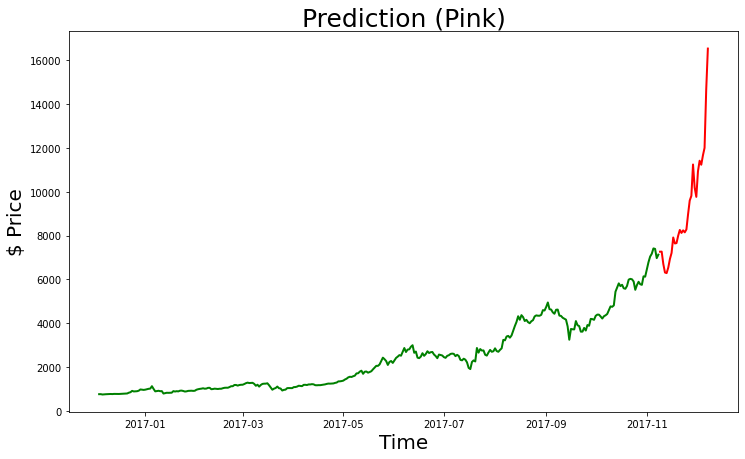

In [23]:
plt.figure(figsize = (12, 7))

plt.plot(bitcoin["date"][-400:-60], bitcoin["open"][-400:-60], color='green', lw=2)
plt.plot(future_set["date"], prediction, color='red', lw=2)

plt.title("Prediction (Pink)", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

plt.show()